# Project: Investigating No-Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset: No-show Appointments

This dataset contains information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. Some of them are,

    1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    2. ‘AppointmentDay’ tells us on what day the patient has to show up for the medical checkup.
    3. ‘Neighborhood’ indicates the location of the hospital.
    4. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    5. Reasons include Hipertension, Diabetes, Alcoholism and Handcap
    6. ‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    
#### Below are the questions that will be explored over the course of the report.

    1. Does the difference between `scheduled_day` and `appointment_day` impact whether or not the patient shows up?
    2. Does day of week affect `no-show`?
    3. Does the `age_group` have a bearing on `no_show`?
    4. Which `neighbourhoods` with high appointments have high `no_show` rate?
    5. Which condition or disease ('hypertension', 'diabetes', 'alcoholism' and 'handcap') has higher `no-show` rate?

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Thankfully there are no null values and incorrect datatypes in the dataset.

In [3]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


For convenience let's make all column names lower case.

In [4]:
df.columns = [x.strip().lower() for x in df.columns]
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data Cleaning

In [5]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset appears to be mostly correct except that there are some records with age equals to -1, which is incorrect. Let's find those records and remove them.

In [6]:
df[df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Let's check if the above patientid has any other records so that we can replace age -1 with any other correct value.

In [7]:
df[np.isclose(df['patientid'], 4.659430e+14)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


So there is only one record with age -1, therefore let's remove that record.

In [8]:
    df.drop([99832], inplace = True)
df[df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


Now let's check for duplicate records.

In [9]:
print(sum(df.duplicated()))
print(sum(df.patientid.duplicated()))
print(sum(df.appointmentid.duplicated()))

0
48783
0


So there are neither duplicate records nor duplicate appointment Ids, but there are 48783 duplicate patient IDs. This may be because several patients had to make multiple visits in that year. Moreover we still do not know if a patient ID actually represents just one patient or it can be shared by many. So, lets explore a combination of four columns `patientid`, `gender`, `age` and `neighbourhood` to know if they together could refer one unique patient.

In [10]:
temp = df[['patientid', 'gender', 'age', 'neighbourhood']]
sum(temp.duplicated())

47061

There are so many duplicate combinations of `patientid`, `gender`, `age` and `neighbourhood`, it clearly indicates many patients had to make multiple visits throughout the year.

In [11]:
temp.drop_duplicates(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
temp.shape

(63465, 4)

Identifying patients with same `patientid`, `gender` and `neighbourhood`, but different `age`.

In [13]:
temp_2 = temp[temp.groupby(['patientid', 'gender', 'neighbourhood'])['age'].transform('nunique') > 1]
temp_2.head(2)

,patientid,gender,age,neighbourhood
40,9.968680e+14,F,55,TABUAZEIRO
73,4.542130e+13,F,68,REPÚBLICA


In [14]:
df[np.isclose(df['patientid'], 9.96868e+14)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
40,9.968680e+14,5635881,F,2016-04-28T14:14:16Z,2016-04-29T00:00:00Z,55,TABUAZEIRO,0,0,0,0,0,0,No
100196,9.968680e+14,5616959,F,2016-04-25T15:06:32Z,2016-06-01T00:00:00Z,56,TABUAZEIRO,0,0,0,0,0,1,No


Identifying patients with same `patientid`, `age` and `neighbourhood`, but different `gender`.

In [15]:
temp_3 = temp[temp.groupby(['patientid', 'age', 'neighbourhood'])['gender'].transform('nunique') > 1]
temp_3.head(2)

,patientid,gender,age,neighbourhood


Therefore it seems there are no such records.

Now let's see if there are patients with same `patientid`, `gender` and `age` but different `neighbourhood`.

In [16]:
temp_4 = temp[temp.groupby(['patientid', 'gender', 'age'])['neighbourhood'].transform('nunique') > 1]
print(temp_4.shape)
temp_4.head(2)

(4, 4)


,patientid,gender,age,neighbourhood
25920,6.326740e+12,M,0,BELA VISTA
34931,8.622320e+11,F,44,TABUAZEIRO


Hence there are four records with same `patientid`, `gender` and `age` but different `neighbourhood`.

The above therefore results indicate a patient can be uniquely identified sometimes either by a combination of `patientid`, `gender` and `age` or by a combination of `patientid`, `gender` and `neighbourhood`. Because in some cases the patient's age had increased by one due to birthday and in some cases the patient had moved from one locality to another.

And patients with `age` equals to `zero` are assumed to be new borns.

This analysis was performed to just understand the data better, anyway we are not worried about an individual patient per se as far as the investigation of this dataset is concerned. However, our analysis will mainly be focused on finding some potential general factors that might be useful in determining if a patient will show up on the day of appointment or not.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
Does the difference between `scheduled_day` and `appointment_day` impact whether or not the patient shows up?

First let's get the scheduled and appointment dates from `scheduledday` and `appointmentday` strings.

In [17]:
df['scheduled_date'] = df.scheduledday.str[:10]
df['scheduled_date'] = pd.to_datetime(df['scheduled_date'], format = '%Y-%m-%d')

df['appointment_date'] = df.appointmentday.str[:10]
df['appointment_date'] = pd.to_datetime(df['appointment_date'], format = '%Y-%m-%d')

In [18]:
#Creating a new column for the difference between the two dates
df['sch_appt_diff'] = df['appointment_date'] - df['scheduled_date']

In [19]:
df.sch_appt_diff.describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: sch_appt_diff, dtype: object

In [20]:
#Converting data type of 'sch_appt_diff' from timedelta64[ns] to int
df['sch_appt_diff'] = df['sch_appt_diff'].dt.days

In [21]:
df.sch_appt_diff.dtype

dtype('int64')

In [22]:
sum(df.sch_appt_diff < 0)

5

Therefore, there are only five records with `appointment_date` ahead of `scheduled_date` (day on which the appointment is set), which is not possible. So let's ignore these records.

In [23]:
    #Categorising the difference between the two dates as low, medium, high and very_high
    bin_edges = [-7, 7, 20, 45, 179]
    bin_names = ['low', 'medium', 'high', 'very_high']
    df['diff_cat'] = pd.cut(df['sch_appt_diff'], bin_edges, labels = bin_names)

In [24]:
df.sample(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduled_date,appointment_date,sch_appt_diff,diff_cat
100627,7.723590e+13,5755067,M,2016-06-01T07:02:45Z,2016-06-08T00:00:00Z,52,REDENÇÃO,0,0,0,0,0,1,No,2016-06-01,2016-06-08,7,low
99109,9.551910e+12,5767322,F,2016-06-02T17:08:44Z,2016-06-08T00:00:00Z,52,JARDIM DA PENHA,0,1,0,0,0,1,No,2016-06-02,2016-06-08,6,low
14099,2.768390e+12,5655615,M,2016-05-03T19:31:24Z,2016-05-03T00:00:00Z,26,BONFIM,0,1,0,0,0,0,No,2016-05-03,2016-05-03,0,low


Now let's see the distribution of appointments for each category of difference between the scheduled and appointment day.

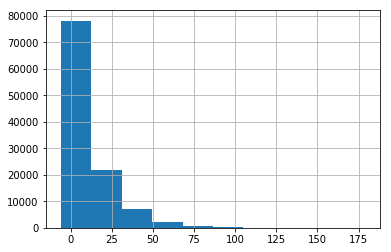

In [25]:
df.sch_appt_diff.hist();

The above plot implies most of the appointments happened on their respective scheduled day itself since frequency of the difference between both dates being zero is the highest.

Reordering some columns and renaming some big column names for convenience.

In [26]:
print(list(df.columns.values))

['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show', 'scheduled_date', 'appointment_date', 'sch_appt_diff', 'diff_cat']


In [27]:
cols = ['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show', 'scheduled_date', 'appointment_date', 'sch_appt_diff', 'diff_cat']
df = df[cols]

In [28]:
df = df.rename(columns = {'appointmentday':'apptday', 'scheduled_date':'sch_date', 'appointment_date':'appt_date',\
                          'no-show':'no_show', 'appt_dayofweek':'appt_dow', 'hipertension':'hypertension'})

In [29]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,apptday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,sch_date,appt_date,sch_appt_diff,diff_cat
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,low


Checking how many no-shows are there for each category.

In [30]:
df.groupby('diff_cat')['no_show'].value_counts()

diff_cat   no_show
low        No         61183
           Yes         9569
medium     No         13088
           Yes         5950
high       No         11247
           Yes         5616
very_high  No          2689
           Yes         1184
Name: no_show, dtype: int64

In [31]:
#Proportions
low = len(df[(df.diff_cat == 'low') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'low'])
medium = len(df[(df.diff_cat == 'medium') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'medium'])
high = len(df[(df.diff_cat == 'high') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'high'])
very_high = len(df[(df.diff_cat == 'very_high') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'very_high'])
low, medium, high, very_high

(0.13524706015377658,
 0.31253282907868474,
 0.3330368261875111,
 0.30570617092693003)

Plotting the no-show rates for each category.

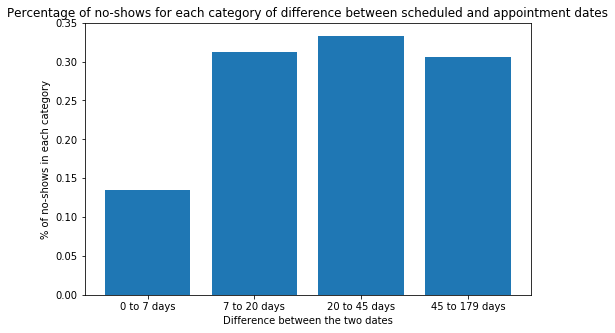

In [178]:
plt.subplots(figsize = (8, 5))
plt.title("Percentage of no-shows for each category of difference between scheduled and appointment dates")
plt.bar(['0 to 7 days', '7 to 20 days', '20 to 45 days', '45 to 179 days'], [low, medium, high, very_high])
plt.xlabel("Difference between the two dates")
plt.ylabel("% of no-shows in each category");

The above plot clearly indicates no-shows are less likely to occur if the appointment day falls within one week from the day it was scheduled.

### Research Question 2
Does day of week affect `no-show`?

Creating three more columns each for the appointment year, month and day so that they can be used for futher analysis like finding the day of a given appointment date.

In [33]:
df['appt_y'] = df.appt_date.dt.year
df['appt_m'] = df.appt_date.dt.month
df['appt_d'] = df.appt_date.dt.day

In [34]:
df.sample(3)

,patientid,appointmentid,gender,scheduledday,apptday,age,neighbourhood,scholarship,hypertension,diabetes,...,handcap,sms_received,no_show,sch_date,appt_date,sch_appt_diff,diff_cat,appt_y,appt_m,appt_d
1806,5.425900e+11,5637582,M,2016-04-29T07:09:51Z,2016-04-29T00:00:00Z,29,SANTA CLARA,0,0,0,...,0,0,No,2016-04-29,2016-04-29,0,low,2016,4,29
91348,1.422420e+14,5762490,F,2016-06-02T07:49:29Z,2016-06-06T00:00:00Z,3,SANTA MARTHA,0,0,0,...,0,1,Yes,2016-06-02,2016-06-06,4,low,2016,6,6
56340,7.119830e+13,5522379,M,2016-03-29T14:12:18Z,2016-05-02T00:00:00Z,4,ITARARÉ,0,0,0,...,0,1,Yes,2016-03-29,2016-05-02,34,high,2016,5,2


Now let's create a new column for the appointment day of a week `appt_dow`.

In [35]:
import datetime as dt

df['appt_dow'] = df.apply(lambda row: dt.date(row['appt_y'], row['appt_m'], row['appt_d']).strftime("%A"), axis=1)

In [36]:
df.sample(2)

,patientid,appointmentid,gender,scheduledday,apptday,age,neighbourhood,scholarship,hypertension,diabetes,...,sms_received,no_show,sch_date,appt_date,sch_appt_diff,diff_cat,appt_y,appt_m,appt_d,appt_dow
16589,2.547180e+11,5625030,F,2016-04-26T18:32:35Z,2016-05-04T00:00:00Z,44,MARIA ORTIZ,0,0,0,...,0,No,2016-04-26,2016-05-04,8,medium,2016,5,4,Wednesday
2517,6.832920e+12,5625110,F,2016-04-27T06:50:20Z,2016-04-29T00:00:00Z,60,CRUZAMENTO,0,1,1,...,0,Yes,2016-04-27,2016-04-29,2,low,2016,4,29,Friday


Let's see the distribution of appointments for each day of week.

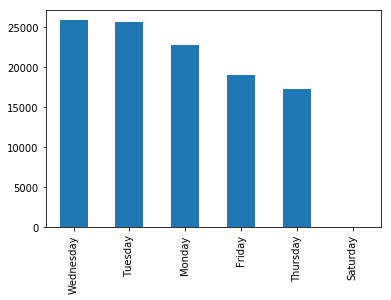

In [37]:
df['appt_dow'].value_counts().plot(kind = 'bar');

Therefore Wednesdays and Tuesdays had experienced the most number of appointments. And though Saturdays did handle a few appointments it seems it is mostly a holiday, so let's ignore Saturdays for further analysis.

Now let's find the proportion of each day to the total number of week days ignoring the weekends.

In [39]:
day_counts = df.groupby('appt_dow')['appt_dow'].count()

#Ignoring Saturday
tot_week_days = df.shape[0] - df['appt_dow'].value_counts()['Saturday']
mon_prop = day_counts['Monday'] / tot_week_days
tue_prop = day_counts['Tuesday'] / tot_week_days
wed_prop = day_counts['Wednesday'] / tot_week_days
thur_prop = day_counts['Thursday'] / tot_week_days
fri_prop = day_counts['Friday'] / tot_week_days

day_props = mon_prop, tue_prop, wed_prop, thur_prop, fri_prop
day_props

(0.20558074705621476,
 0.2320635006833383,
 0.23411804103650202,
 0.1560998126476418,
 0.1721378985763031)

Checking how many no-shows are there for each day of a week.

In [40]:
df.groupby('appt_dow')['no_show'].value_counts()

appt_dow   no_show
Friday     No         14982
           Yes         4037
Monday     No         18024
           Yes         4690
Saturday   No            30
           Yes            9
Thursday   No         13909
           Yes         3338
Tuesday    No         20488
           Yes         5152
Wednesday  No         20774
           Yes         5093
Name: no_show, dtype: int64

In [41]:
#Proportion of no-shows on a particular day of a week except Saturday

monday = len(df[(df.appt_dow == 'Monday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Monday'])
tuesday = len(df[(df.appt_dow == 'Tuesday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Tuesday'])
wednesday = len(df[(df.appt_dow == 'Wednesday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Wednesday'])
thursday = len(df[(df.appt_dow == 'Thursday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Thursday'])
friday = len(df[(df.appt_dow == 'Friday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Friday'])

day_noshow_props = monday, tuesday, wednesday, thursday, friday
day_noshow_props

(0.20648058466144228,
 0.20093603744149766,
 0.19689179263153825,
 0.1935409056647533,
 0.21226142278773857)

Sorting the above values in the ascending order.

In [42]:
from operator import itemgetter

nsr_dow = {'Monday':monday, 'Tuesday':tuesday, 'Wednesday':wednesday, 'Thursday':thursday, 'Friday':friday}
nsr_dow = sorted(nsr_dow.items(), key=itemgetter(1))

days = []
values1 = []

for i in range(len(nsr_dow)):
    days.append(nsr_dow[i][0])
    values1.append(nsr_dow[i][1])

Plotting the no-show rates in ascending order for each day of a week.

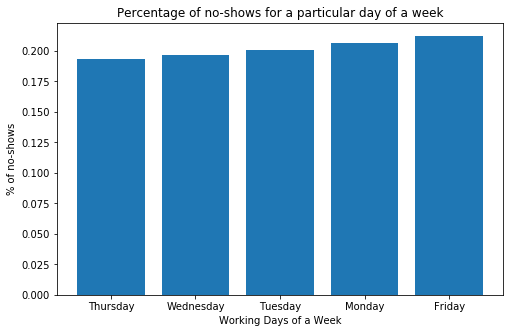

In [43]:
plt.subplots(figsize = (8, 5))
plt.title("Percentage of no-shows for a particular day of a week")
plt.bar(days, values1)
plt.xlabel("Working Days of a Week")
plt.ylabel("% of no-shows");

In [45]:
np.mean([monday, tuesday, wednesday, thursday, friday])

0.202022148637394

Therefore Mondays and Fridays tend to have higher than average no-show rates.

Now, setting the x coordinate location for each day and width of each bar.

In [44]:
ind = np.arange(len(day_props))  # the x locations for the groups
width = 0.3       # the width of the bars

[0.15 1.15 2.15 3.15 4.15]


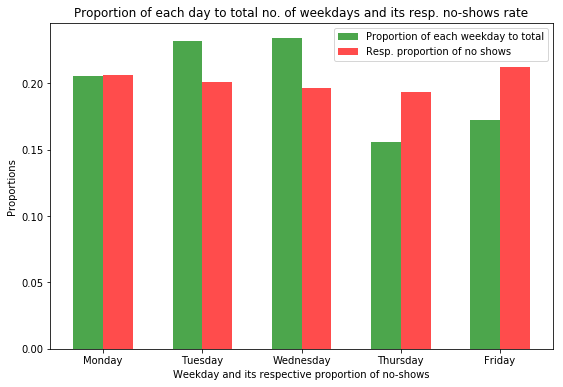

In [45]:
# plot bars
plt.figure(figsize = (9, 6))
day_bars = plt.bar(ind, day_props, width, color='g', alpha=.7, label='Proportion of each weekday to total')
no_show_bars = plt.bar(ind + width, day_noshow_props, width, color='r', alpha=.7, label='Resp. proportion of no shows ')

# title and labels
plt.ylabel('Proportions')
plt.xlabel('Weekday and its respective proportion of no-shows')
plt.title('Proportion of each day to total no. of weekdays and its resp. no-shows rate')
locations = ind + width / 2  # xtick locations
print(locations)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

From the above plot we can say that though Thursdays and Fridays handled less than average no. of appointments they have higher no-show rates, and Tuesdays and Wednesdays had handled nearly half of the appoinments. And Mondays and Fridays had experienced higher than average no-show rate, which also happens to fall just before and after the weekends.

### Research Question 3
Does the `age_group` have a bearing on `no_show`?

Checking the distribution of the age.

In [46]:
df.describe().age

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Categorising ages as `infant`, `child`, `youth`, `middle_aged` or `senior`.

In [47]:
bin_edges = [-0.1, 5, 16, 35, 60, 115]     #To include zero -0.1 has been chosen as the first edge
bin_names = ['infant', 'child', 'youth', 'middle_aged', 'senior']
df['age_group'] = pd.cut(df['age'], bin_edges, labels = bin_names)
df.head(2)

,patientid,appointmentid,gender,scheduledday,apptday,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,sch_date,appt_date,sch_appt_diff,diff_cat,appt_y,appt_m,appt_d,appt_dow,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,No,2016-04-29,2016-04-29,0,low,2016,4,29,Friday,senior
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,No,2016-04-29,2016-04-29,0,low,2016,4,29,Friday,middle_aged


Plotting the distribution of appointments for each age group.

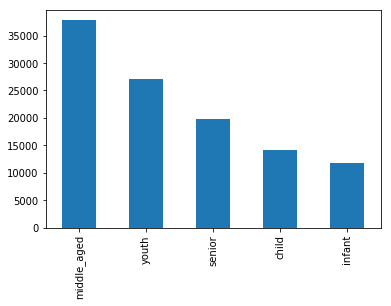

In [57]:
df['age_group'].value_counts().plot(kind = 'bar');

Therefore the middle-aged and youth who fall within the 5 and 35 years get the major chunk of appoinments.

Checking how many no-shows are there for each age group.

In [58]:
df.groupby('age_group')['no_show'].value_counts()

age_group    no_show
infant       No          9546
             Yes         2185
child        No         10723
             Yes         3416
youth        No         20634
             Yes         6499
middle_aged  No         30548
             Yes         7213
senior       No         16756
             Yes         3006
Name: no_show, dtype: int64

Now let's find the proportion of no-shows for each age group.

In [59]:
infant = len(df[(df.age_group == 'infant') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'infant'])
child = len(df[(df.age_group == 'child') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'child'])
youth = len(df[(df.age_group == 'youth') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'youth'])
middle_aged = len(df[(df.age_group == 'middle_aged') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'middle_aged'])
senior = len(df[(df.age_group == 'senior') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'senior'])

infant, child, youth, middle_aged, senior

(0.18625863097775125,
 0.24160124478393097,
 0.23952382707404268,
 0.1910171870448346,
 0.1521101103127214)

Sorting proportions of no-show rate for each age group in ascending order.

In [60]:
nsr_age = {'Infant':infant, 'Child':child, 'Youth':youth, 'Middle_aged':middle_aged, 'Senior':senior}
nsr_age = sorted(nsr_age.items(), key=itemgetter(1))

age_groups = []
values2 = []

for i in range(len(nsr_age)):
    age_groups.append(nsr_age[i][0])
    values2.append(nsr_age[i][1])

Plotting the no-show rates in ascending order for each age group.

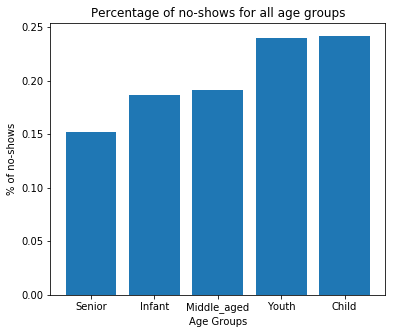

In [62]:
plt.subplots(figsize = (6, 5))
plt.title("Percentage of no-shows for all age groups")
plt.bar(age_groups, values2)
plt.xlabel("Age Groups")
plt.ylabel("% of no-shows");

In [63]:
np.mean([infant, child, youth, middle_aged, senior])

0.20210220003865617

Therefore, the no-show rates for youth, children and middle-aged groups (between 5 and 60 years) tend to be either above or around average.

### Research Question 4
Which `neighbourhoods` with high number of appointments have high `no_show` rate?

Analysing the `neighbourhood` stats.

In [68]:
df.neighbourhood.describe()

count             110526
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

In [69]:
df.neighbourhood.value_counts().describe()

count      81.000000
mean     1364.518519
std      1369.191779
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: neighbourhood, dtype: float64

Therefore, there are a total of eighty-one unique neighbourhoods with a median value of 851 appointments, so lets consider only those neighbourhoods that had more than 851 appointments.

In [70]:
df_top_nbhd = df[df.groupby('neighbourhood')['neighbourhood'].transform('value_counts') > 851]
print(df_top_nbhd.neighbourhood.nunique())

40


In [74]:
top_40 = list(df_top_nbhd.neighbourhood.unique())

values = []
appointments = []

for i in range(len(top_40)):
    nbhd = top_40[i]
    num = len(df_top_nbhd[(df_top_nbhd.neighbourhood == nbhd) & (df_top_nbhd.no_show == 'Yes')])
    den = len(df_top_nbhd[df_top_nbhd.neighbourhood == nbhd])
    appointments.append(den)
    values.append(num / den)

In [75]:
data = {'neighbourhood':top_40, 'appointments':appointments, 'no_show_rate':values}
df_nbhd = pd.DataFrame(data)
df_nbhd.sort_values(['no_show_rate'], ascending = False, inplace = True)
df_nbhd.head()

,neighbourhood,appointments,no_show_rate
28,SANTOS DUMONT,1276,0.289185
23,ITARARÉ,3514,0.262664
35,JESUS DE NAZARETH,2853,0.243954
38,ILHA DO PRÍNCIPE,2266,0.234775
29,CARATOÍRA,2565,0.230409


The above are the busy neighbourhoods with top five no-show rates.

Now let's try to plot a heatmap between top ten neighbourhoods in terms of no-show rate and their respective no-show rate for each weekday.

In [164]:
#Selecting the top ten records from the above dataframe df_nbhd
top_ten = df_nbhd.head(10)

Doing an inner merge between parent 'df' and 'top_ten' on 'neighbourhood' to select only those records of patients from neighbourhoods present in 'top_ten'.

In [166]:
df_10 = df.merge(top_ten, on = 'neighbourhood')
df_10 = df_10[df_10.appt_dow != 'Saturday']    #Dropping those few records where appointments were fixed on Saturdays

Creating a new dataframe `nbhd_no_show` which contains `neighbourhood` and its corresponding `appt_dow`, `yes_no_show`, `yes_count`, `total_appts` and `no_show_rate`

In [168]:
df1 = pd.DataFrame({'count' : df_10.groupby(['neighbourhood', 'appt_dow', 'no_show']).size()}).reset_index()
df2 = pd.DataFrame({'total_appts' : df1.groupby(['neighbourhood', 'appt_dow'])['count'].sum()}).reset_index()

df1 = df1[df1.no_show == 'Yes']
nbhd_no_show = df1.merge(df2, on = ['neighbourhood', 'appt_dow'])
nbhd_no_show['no_show_rate'] = nbhd_no_show['count'] / nbhd_no_show['total_appts']
nbhd_no_show.rename(columns = {'no_show':'yes_no_show', 'count':'yes_count'})
nbhd_no_show.sample(3)

,neighbourhood,appt_dow,no_show,count,total_appts,no_show_rate
36,MARUÍPE,Monday,Yes,92,408,0.225490
5,BENTO FERREIRA,Friday,Yes,43,174,0.247126
25,ITARARÉ,Friday,Yes,112,505,0.221782


In [169]:
import seaborn as sns

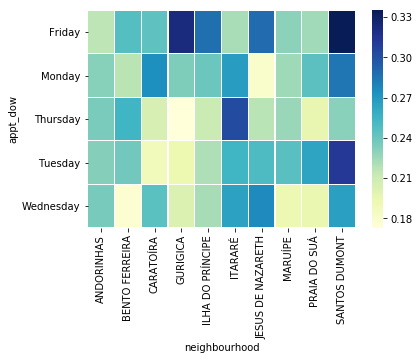

In [170]:
results = nbhd_no_show.pivot(index = 'appt_dow', columns = 'neighbourhood', values = 'no_show_rate')
sns.heatmap(results, linewidths = 0.2, cmap = 'YlGnBu')
plt.show();

Earlier we saw that Fridays, Mondays and Tuesdays had the top three no-show rates. Even these ten neighbourhoods appear to be consistent with that trend as we can see from the above map these three days have the most number of darker cells.

### Research Question 5
Which condition or disease ('hypertension', 'diabetes', 'alcoholism' and 'handcap') has higher `no-show` rate?

In [171]:
hypertension = len(df[(df.hypertension == 1) & (df.no_show == 'Yes')]) / len(df[df.hypertension == 1])
diabetes = len(df[(df.diabetes == 1) & (df.no_show == 'Yes')]) / len(df[df.diabetes == 1])
alcoholism = len(df[(df.alcoholism == 1) & (df.no_show == 'Yes')]) / len(df[df.alcoholism == 1])
handicap = len(df[(df.handcap == 1) & (df.no_show == 'Yes')]) / len(df[df.handcap == 1])

hypertension, diabetes, alcoholism, handicap

(0.17301958625751113,
 0.18003273322422259,
 0.20148809523809524,
 0.1792360430950049)

Sorting the above values in the ascending order.

In [172]:
nsr_disease = {'Hypertension':hypertension, 'Diabetes':diabetes, 'Alcoholism':alcoholism, 'Handicap':handicap}
nsr_disease = sorted(nsr_disease.items(), key=itemgetter(1))

diseases = []
values3 = []

for i in range(len(nsr_disease)):
    diseases.append(nsr_disease[i][0])
    values3.append(nsr_disease[i][1])

Plotting the no-show rates for each age group.

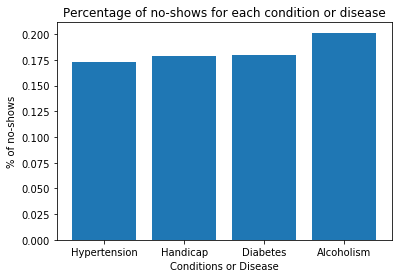

In [175]:
plt.subplots(figsize = (6, 4))
plt.title("Percentage of no-shows for each condition or disease")
plt.bar(diseases, values3)
plt.xlabel("Conditions or Disease")
plt.ylabel("% of no-shows");

Therefore patients reffered for alcoholism have the highest no-show rate.

<a id='conclusions'></a>
## Conclusions

#### In the same order of questions,

    1. Closer the appointment date is to scheduled date, the more likely the patient will show up on the respective appointment date. No-shows are highly likely if the appointment day falls after one week from the day it was scheduled.
2. Fridays and Mondays are the top two days in terms of no-show rates. Their respective no-show rates are 21.26 and 20.65 percent which are slightly higher than the average rate of 20.2 percent. These two days also happen to fall just before and after the weekends.
3. The no-show rates for different age groups between the age of 5 and 60 years (youth, children and middle-aged) are either above average or around average. This might be due to the reason that majority of patients belonging to these three age groups are independent and working, due to which many of them probably are not finding time to make the visit.
4. Santos Dumont, Itarare, Jesus De Nazarath, Ilha Do Principe and Caratoira are the busy neighbourhoods with top five no-show rates.
5. Patients referred for Alcoholism have the highest no-show rates.

#### Limitations

It just so happened that the chosen dataset was almost clean and neat. There were no null records and was only one record with a negative age and a few records with appointment date falling even before their respective scheduled date. However to investigate it further more columns for scheduled date, appointment date, difference between the two dates and its category, appointment day, appointment month, appointment year, appointment day of week and age group had to be created.